# Бинарная линейная классификация

## Предсказания в бинарной линейной классификации

**Вспомнить из лекции:**
* Вспомните обозначения $\langle \cdot, \cdot \rangle$, $sign(z)$, $\left[ {z>a} \right]$.
* Как выполняются предсказания в бинарной линейной классификации?
* Как интерпретировать веса?


**Ваш ответ:**
* $\langle \cdot, \cdot \rangle$ - скалярное произведение между двумя векторами. 

  $sign(z)$ - функция знака

  $\left[ {z>a} \right]$ - индикаторная функция

* Считается на основе дискриминантной функции $sign(\langle w, x \rangle+w_0)$

* Чем больше вес, тем больше влияние на процесс принятия решения о пренадлежности признака к классу 

### Задача 1
Какое предсказание вернет бинарный линейный классификатор $a(x) = sign(\langle w, x \rangle+w_0)$ для объекта $x=(1, 0, 0, 1, 1)$ при использовании весов $w=(0.1, -0.2, 0.5, -1.1, 0)$ и $w_0=0.35$?

### Ваше решение
 
$a(x) = sign((0.1 · 1 + (-0.2) · 0 + 0.5 · 0 + (-1.1) · 1 + 0 · 1 = 0.1 + 0 + 0 - 1.1 + 0)+0.35)= sign(-1+0.35) = sign(-0.65) = -1$    


### Задача 2
Визуализируйте разделящую поверхность классификатора $a(x) = sign(\langle w, x \rangle+w_0)$ для $w=(-1; 2)$, $w_0=0,5$, задача бинарной классификации с двумя признаками.


**Замечание**. Аналогично линейной регрессии, в линейной классификации можно добавить единичный константный признак в матрицу объекты-признаки $X$. В этом случае свободный член $w_0$ в формулах не пишется, так как входит в общий вектор весов $w$.

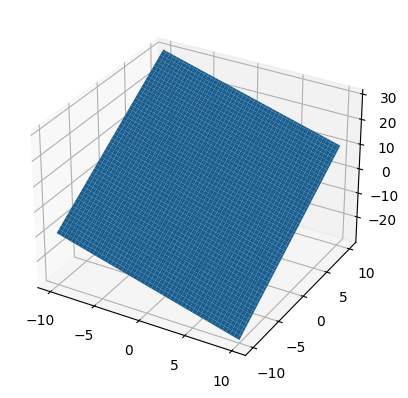

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
y = x1*(-1)+x2*2+0.5
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x1, x2, y, alpha=1)

## Метрики качества бинарной классификации

**Вспомнить из лекций:**

Как вычисляются следующие метрики качества:
* точность
* полнота
* *F*-мера
* *AUC-ROC*
* *AUC-RPC*

**Ваш ответ**
* Точность:

$$
precision(a, X) = \frac {TP} {TP+FP}
$$

* Полнота:

$$
recall(a, X) = \frac {TP} {TP+FN}
$$

* F-мера

$$
F = \frac {2*precision*recall} {precision+recall}
$$


* AUC-ROC - площадь под ROC кривой

* AUC-RPC - площадь под RPC кривой

**Справочная информация**

$$
FPR = \frac {FP} {FP+TN}
$$


$$
TPR = \frac {TP} {TP+FN}
$$

Большинство алгоритмов бинарной классификации работают следующим образом: они предсказывают для объекта  $x$ вещественное число $b(x)$, а затем сравнивают его с порогом $T$: 
- если $b(x) < T$, то предсказывается класс -1, 
- иначе предсказывается класс +1. 

Это можно записать в терминах функции *sign* (знак):
$$a(x) = sign(b(x)-T)$$

Метрики качества бинарной классификации можно разделить на две группы: 

оценивают 
- бинарные предсказания $a(x)$ (класс -1 и +1), 
- вещественные предсказания $b(x)$. 

Некоторые метрики последней группы варьируют порог, и оценивают качество бинарных предсказаний при различных порогах. Это полезно, чтобы "отделить" качество работы алгоритма от качества выбора конкретного порога. 

### Вопрос 
Какие из рассмотренных в лекциях метрик относятся к каждой группе?

### Ваш ответ

* бинарные -  $precision$, $recall$, $F$-$мера$
* вещественные - $AUC$-$ROC$, $AUC$-$RPC$.

### Задача 3
Вычислить (вручную) *accuracy*, точность, полноту и  *F*-меру для следующих векторов предсказаний и правильных ответов:

|                               |    |    |    |    |    |    |    |
|-------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | +1 | -1 | +1 | +1 | -1 | +1 | -1 |
| Предсказание                  | -1 | +1 | +1 | +1 | -1 | -1 | -1 |


### Ваше решение

|                               |    |    |    |    |    |    |    |
|-------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных)  | +1 | -1 | +1 | +1 | -1 | +1 | -1 |
| Предсказание                  | -1 | +1 | +1 | +1 | -1 | -1 | -1 |
| Матрица ошибок                | FN | FP | TP | TP | TN | FN | TN |

$TP = 2$  

$FP = 1$

$TN = 2$    

$FN = 2$

$$
accuracy(a, X) = \frac {4} {7}
$$

$$
precision(a, X) = \frac {2} {2+1} = \frac {2} {3}
$$

$$
recall(a, X) = \frac {2} {2+2} =  \frac {1} {2}
$$

$$
F = \frac {2*2/3*0.5} {2/3+0.5} = \frac {4} {7}
$$

**Обратите внимание**: при вычислении метрик мы не используем то, что отрицательный класс обозначен -1, а положительный - +1. Нам главное понимать, какой класс мы считаем положительным. Значения метрик не поменяются, если обозначить классы, например, 0 и 1.

### Задача 4
Рассмотрим алгоритм вида $$a(x) = sign(b(x)-T).$$ Пусть для любого объекта $x$ выполнено $-10 < b(x) < 10$. Какова будет точность и полнота алгоритма, если положить $T=-15$? $T=15$? 

### Ваше решение
При $T=-15$ 

$a(x)=sign(-10-(-15))=sign(5)$ = $+1$    
$a(x)=sign(10-(-15))=sign(25)$ = $+1$    

Например, b(x) принимает следующие значения:

|                               |    |    |    |    |    |
|-------------------------------|----|----|----|----|----|
| b(x)                          | -8 | -9 | -1 | 1  | 6  |
| y                             | -1 | -1 | -1 | +1 | +1 |
| a(x)                          | +1 | +1 | +1 | +1 | +1 |
| Ошибка                        | FP | FP | FP | TP | TP |

$TP = 2$    

$FP = 3$    

$TN = 0$    

$FN = 0$ 

$$
precision(a, X) = \frac {2} {2+3} = \frac {2} {5} = 0.4
$$

$$
recall(a, X) = \frac {2} {2+0} = 1
$$

Следовательно, при $T=-15$ полнота всегда имеет значение 1, а точность 0.4

При $T=15$ 

$a(x)=sign(-10-15)=sign(-25)$ = $-1$.    
$a(x)=sign(10-15)=sign(-5)$ = $-1$.    

Например, b(x) принимает следующие значения:

|                               |    |    |    |    |    |
|-------------------------------|----|----|----|----|----|
| b(x)                          | -8 | -9 | -1 | 1  | 6  |
| y                             | -1 | -1 | -1 | +1 | +1 |
| a(x)                          | -1 | -1 | -1 | -1 | -1 |
| Ошибка                        | TN | TN | TN | FN | FN |

$TP = 0$    

$FP = 0$    

$TN = 3$    

$FN = 2$    

$$
precision(a, X) = \frac {0} {0+0} - невозможно
$$

$$
recall(a, X) = \frac {0} {0+2} = 0
$$

Следовательно, при $T=15$ полнота всегда имеет значение 0, а точность определить невозможно

### Задача 5

Найти (вручную) точки, необходимые для пострения ROC-кривой для следующих векторов предсказаний и правильных ответов:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| Предсказание $b(x)$          | 1  | 15 | -1 | 7  | 3  | -8 | -5 |

**Указание:** cледует сначала отсортировать объекты по возрастанию вещественных предсказаний $b(x)$. 

### Ваше решение

При $T=16$ точка $(0,0)$

При $T=8$:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| y                            | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| a(x)                         | -1 | +1 | -1 | -1 | -1 | -1 | -1 |
| Ошибка                       | TN | TP | FN | TN | FN | TN | TN |

$TP = 1$ 

$TN = 4$   

$FP = 0$   

$FN = 2$    

$$
FPR = \frac {0} {0+4} = 0
$$

$$
TPR = \frac {1} {1+2} = \frac {1} {3}
$$

Точка $(0, 0.3)$

При $T=4$:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| y                            | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| a(x)                         | -1 | +1 | -1 | +1 | -1 | -1 | -1 |
| Ошибка                       | TN | TP | FN | FP | FN | TN | TN |

$TP = 1$ 

$TN = 3$     

$FP = 1$   

$FN = 2$

$$
FPR = \frac {1} {1+3} = 0.25
$$

$$
TPR = \frac {1} {1+2} = 0.3
$$

Точка $(0.25, 0.3)$

При $T=2$:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| y                            | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| a(x)                         | -1 | +1 | -1 | +1 | +1 | -1 | -1 |
| Ошибка                       | TN | TP | FN | FP | TP | TN | TN |

$TP = 2$ 

$TN = 3$   

$FP = 1$   

$FN = 1$

$$
FPR = \frac {1} {1+3} = 0.25
$$

$$
TPR = \frac {2} {2+1} = 0.6
$$

Точка $(0.25, 0.6)$

При $T=0$:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| y                            | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| a(x)                         | +1 | +1 | -1 | +1 | +1 | -1 | -1 |
| Ошибка                       | FP | TP | FN | FP | TP | TN | TN |

$TP = 2$ 

$TN = 2$     

$FP = 2$    

$FN = 1$

$$
FPR = \frac {2} {2+2} = 0.5
$$

$$
TPR = \frac {2} {2+1} = 0.6
$$

Точка $(0.5, 0.6)$

При $T=-4$:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| y                            | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| a(x)                         | +1 | +1 | +1 | +1 | +1 | -1 | -1 |
| Ошибка                       | FP | TP | TP | FP | TP | TN | TN |

$TP = 3$ 

$TN = 2$   

$FP = 2$    

$FN = 0$

$$
FPR = \frac {2} {2+2} = 0.5
$$

$$
TPR = \frac {3} {3+0} = 1
$$

Точка $(0.5, 1)$

При $T=-7$:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| y                            | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| a(x)                         | +1 | +1 | +1 | +1 | +1 | -1 | +1 |
| Ошибка                       | FP | TP | TP | FP | TP | TN | FP |

$TP = 3$

$TN = 1$   

$FP = 3$    

$FN = 0$

$$
FPR = \frac {3} {3+1} = 0.75
$$

$$
TPR = \frac {3} {3+0} = 1
$$

Точка $(0.75, 1)$

При $T=-9$:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| y                            | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| a(x)                         | +1 | +1 | +1 | +1 | +1 | +1 | +1 |
| Ошибка                       | FP | TP | TP | FP | TP | FP | FP |

$TP = 3$

$TN = 0$   

$FP = 4$    

$FN = 0$

$$
FPR = \frac {4} {4+0} = 1
$$

$$
TPR = \frac {3} {3+0} = 1
$$

Точка $(1, 1)$

**Обратите внимание**: при построении *ROC*-кривой мы не используем значения вещественных предсказаний; вещественные предсказания используются только для того, чтобы отсортировать объекты. Поэтому совершенно необязательно, чтобы этими вещественными предсказаниями были вероятности класса +1. Это могут быть любые абстрактные величины, показывающие "склонность" объекта к классу +1.

### Задача 6
Реализовать построение *ROC*-кривой, используя данные задачи 5.

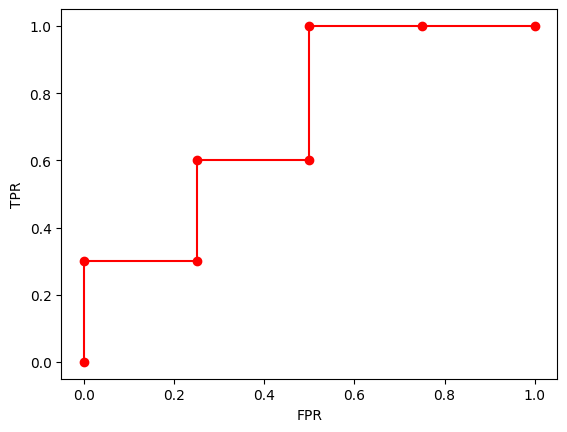

In [ ]:
import matplotlib.pyplot as plt 

x = np.array([0, 0, 0.25, 0.25, 0.5, 0.5, 0.75, 1])
y = np.array([0, 0.3, 0.3, 0.6, 0.6, 1, 1, 1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(x, y, marker="o", color="red")

**Ваш комментарий**:


ROC-кривая выглядит угловато из-за малого объема объектов. Чем ближе кривая проходит к точке (0, 1), тем лучше качество классификатора, поэтому мы можем судить о удовлетворительном, но не о идеальном качестве классификатора

### Задача 7

Какое значение *AUC-ROC* будет у алгоритма $b(x)$, который на каждом объекте возвращает случайное вещественное число из отрезка [-2, 2] (равномерное распределение)? 

У алгоритма, который для всех объектов класса -1 возвращает отрицательное число, а для всех объектов класса +1 - положительное число?

**Ответы подробно обосновать!**


### Ваше решение

1. *AUC-ROC* у алгоритма $b(x)$ будет равен 0.5, так как он выдает случайные ответы, то есть используется бесполезный классификатор

2. *AUC-ROC* у алгоритма $b(x)$ будет равен 1, так как он использует идеальный классификатор, который правильно разделяет объекты двух классов

### Задача 8

Пусть для алгоритма $b(x)$ значение *AUC-ROC* равно 0.2. Каким будет *AUC-ROC* алгоритма $-b(x)$?

**Ответ подробно обосновать!**

### Ваше решение

Если для алогоритма $b(x)$ *AUC-ROC* равно 0.2, то при $-b(x)$ *AUC-ROC* будет равно 0.8, так как оно $ROC$-$кривая$ будет отображена зеркально оси $Y$